<a href="https://colab.research.google.com/github/shaifire06/102116040-SESS-LE1/blob/main/102116040_ShaifaliThakur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Shaifali Thakur**  
Email: `sthakur2_be21@thapar.edu`  
Roll No: **102116040**  
Group: **4CS10**  
Start Timestamp: YYYYMMDD-HHMM  

## Question

Given the dimensionality d of inputs, a sequence H of channel size for each hidden layer, and number of classes C, define a function to

Take as argument a vector of raw inputs x;
Define a neural network classifier with d input channels, len(H) hidden layers, each subsequent layer bearing [h1,h2,...] channels finally resulting in C logits corresponding to each class;
Activate each intermediate layer with tanh
 activation; and
Return the logits.
The function shall be tested for consistency, correctness and efficiency as applicable.

Use PyTorch/Tensorflow for implementation. Use of internet resources is dicouraged in the interest of time, though not prohibited.

## Solution

In [1]:
!wget http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz


!tar -xvzf speech_commands_v0.02.tar.gz

Streaming output truncated to the last 5000 lines.
./on/fc3ba625_nohash_0.wav
./on/db9d52d2_nohash_0.wav
./on/72242187_nohash_4.wav
./on/b0f5b16d_nohash_0.wav
./on/d9aa8c90_nohash_1.wav
./on/525eaa62_nohash_0.wav
./on/42e3f068_nohash_0.wav
./on/94d370bf_nohash_4.wav
./on/bf8d5617_nohash_0.wav
./on/e2b7d6d6_nohash_2.wav
./on/89ed36ab_nohash_0.wav
./on/30276d03_nohash_1.wav
./on/364c0853_nohash_0.wav
./on/7cbf645a_nohash_0.wav
./on/c98bbbd3_nohash_2.wav
./on/9a7c1f83_nohash_5.wav
./on/3589bc72_nohash_0.wav
./on/3ae5c04f_nohash_0.wav
./on/adc216c5_nohash_2.wav
./on/c50f55b8_nohash_15.wav
./on/324210dd_nohash_2.wav
./on/c120e80e_nohash_2.wav
./on/69086eb0_nohash_0.wav
./on/dce05676_nohash_1.wav
./on/435695e3_nohash_1.wav
./on/179a61b7_nohash_1.wav
./on/f5341341_nohash_0.wav
./on/91b03183_nohash_0.wav
./on/96d8bb6f_nohash_2.wav
./on/6a1908f8_nohash_0.wav
./on/6ace4fe1_nohash_1.wav
./on/84d1e469_nohash_1.wav
./on/ba676390_nohash_0.wav
./on/1dc86f91_nohash_4.wav
./on/3a929277_nohash_2.wav
./o

In [2]:
import os
import librosa
import numpy as np

dataset_path = '/content'

commands = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]
print("Commands (folders) in the dataset: ", commands)

sample_file = os.path.join(dataset_path, 'yes', '0a7c2a8d_nohash_0.wav')
y, sr = librosa.load(sample_file, sr=16000)

print(f"Sample rate: {sr}")
print(f"Audio duration: {len(y)/sr} seconds")


Commands (folders) in the dataset:  ['.config', 'house', 'learn', 'marvin', 'two', 'nine', 'left', 'seven', 'right', 'eight', 'follow', '_background_noise_', 'on', 'forward', 'three', 'visual', 'five', 'sheila', 'tree', 'cat', 'dog', 'six', 'up', 'stop', 'go', 'one', 'happy', 'bird', 'off', 'no', 'backward', 'bed', 'wow', 'zero', 'four', 'yes', 'down', 'sample_data']
Sample rate: 16000
Audio duration: 1.0 seconds


In [3]:
# Counting the number of audio files for each command and other directories
command_counts = {
    command: len(os.listdir(os.path.join(dataset_path, command)))
    for command in commands if os.path.isdir(os.path.join(dataset_path, command)) and command not in ['.config', '.ipynb_checkpoints']
}

for command, count in command_counts.items():
    print(f"Command: {command} - samples: {count}")


Command: house - samples: 2113
Command: learn - samples: 1575
Command: marvin - samples: 2100
Command: two - samples: 3880
Command: nine - samples: 3934
Command: left - samples: 3801
Command: seven - samples: 3998
Command: right - samples: 3778
Command: eight - samples: 3787
Command: follow - samples: 1579
Command: _background_noise_ - samples: 7
Command: on - samples: 3845
Command: forward - samples: 1557
Command: three - samples: 3727
Command: visual - samples: 1592
Command: five - samples: 4052
Command: sheila - samples: 2022
Command: tree - samples: 1759
Command: cat - samples: 2031
Command: dog - samples: 2128
Command: six - samples: 3860
Command: up - samples: 3723
Command: stop - samples: 3872
Command: go - samples: 3880
Command: one - samples: 3890
Command: happy - samples: 2054
Command: bird - samples: 2064
Command: off - samples: 3745
Command: no - samples: 3941
Command: backward - samples: 1664
Command: bed - samples: 2014
Command: wow - samples: 2123
Command: zero - samples

In [4]:
import os
import librosa
import numpy as np

dataset_path = '/content'

commands = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

durations = []
for command in commands:
    for file in os.listdir(os.path.join(dataset_path, command)):
        if file.endswith('.wav'):
            y, sr = librosa.load(os.path.join(dataset_path, command, file), sr=16000)
            durations.append(len(y) / sr)


mean_duration = np.mean(durations)
std_duration = np.std(durations)


print(f"Mean duration of audio clips: {mean_duration:.4f} seconds")
print(f"Standard deviation of durations: {std_duration:.4f} seconds")


Mean duration of audio clips: 0.9846 seconds
Standard deviation of durations: 0.5082 seconds


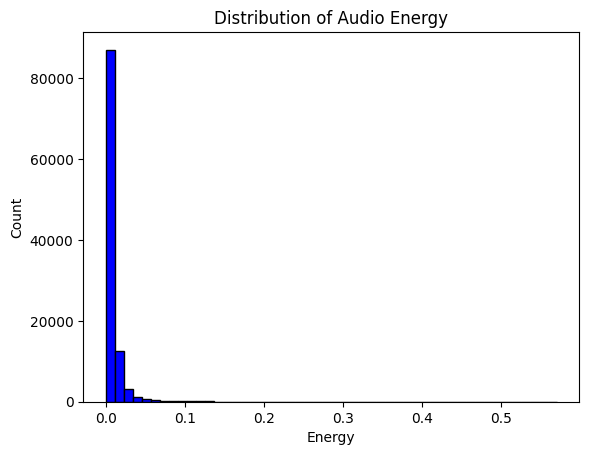

In [5]:
energies = []
for command in commands:
    for file in os.listdir(os.path.join(dataset_path, command)):
        if file.endswith('.wav'):
            y, sr = librosa.load(os.path.join(dataset_path, command, file), sr=16000)
        energy = np.sum(y ** 2) / len(y)
        energies.append(energy)


import matplotlib.pyplot as plt

plt.hist(energies, bins=50, color='blue', edgecolor='black')
plt.title("Distribution of Audio Energy")
plt.xlabel("Energy")
plt.ylabel("Count")
plt.show()


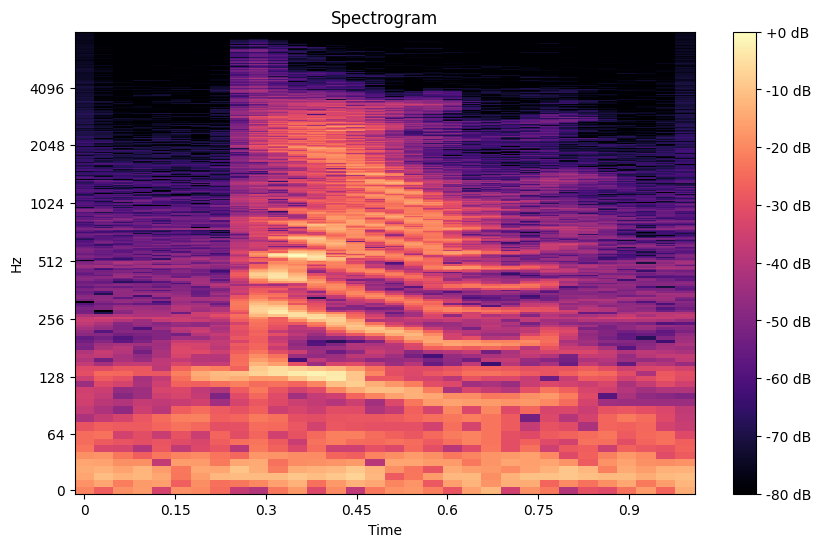

In [6]:
import librosa.display


D = np.abs(librosa.stft(y))


plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


Pre Processing

In [7]:
def extract_features(file_path, sr=16000):
    y, sr = librosa.load(file_path, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)


In [8]:
with open('/content/validation_list.txt', 'r') as f:
    validation_files = f.read().splitlines()

with open('/content/testing_list.txt', 'r') as f:
    testing_files = f.read().splitlines()


In [9]:
X_train, X_val, X_test = [], [], []
y_train, y_val, y_test = [], [], []

for command in commands:
    command_path = os.path.join(dataset_path, command)
    for file in os.listdir(command_path):
        if file.endswith('.wav'):
            file_path = os.path.join(command, file)
            features = extract_features(os.path.join(command_path, file))


            if file_path in validation_files:
                X_val.append(features)
                y_val.append(command)
            elif file_path in testing_files:
                X_test.append(features)
                y_test.append(command)
            else:
                X_train.append(features)
                y_train.append(command)

X_train, X_val, X_test = np.array(X_train), np.array(X_val), np.array(X_test)
y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)

In [11]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)


# Reshaping
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_cnn = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(commands), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
    X_train_cnn, y_train_encoded,
    epochs=10,
    validation_data=(X_val_cnn, y_val_encoded),
    batch_size=32
)

Epoch 1/10
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.1320 - loss: 3.0777 - val_accuracy: 0.1751 - val_loss: 2.9009
Epoch 2/10
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.1449 - loss: 3.0200 - val_accuracy: 0.1810 - val_loss: 2.8840
Epoch 3/10
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1499 - loss: 2.9978 - val_accuracy: 0.1872 - val_loss: 2.8576
Epoch 4/10
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.1548 - loss: 2.9765 - val_accuracy: 0.1829 - val_loss: 2.8761
Epoch 5/10
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.1589 - loss: 2.9658 - val_accuracy: 0.1956 - val_loss: 2.8415
Epoch 6/10
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.1639 - loss: 2.9507 - val_accuracy: 0.1999 - val_loss: 2.8534
Epoch 7/10
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1645 - loss: 2.9436 - val_accuracy: 0.1967 - val_loss: 2.8296
Epoch 8/10
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.1668 - loss: 2.

In [16]:
test_loss, test_acc = model.evaluate(X_test_cnn, y_test_encoded)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1871 - loss: 2.8870
Test accuracy: 0.1929
Test loss: 2.8493


In [17]:
from sklearn.metrics import classification_report

# test set
y_pred = model.predict(X_test_cnn)
y_pred_classes = tf.argmax(y_pred, axis=1)

print(classification_report(y_test_encoded, y_pred_classes))


344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           1       0.09      0.01      0.01       165
           2       0.12      0.03      0.05       207
           3       0.29      0.51      0.37       185
           4       0.19      0.14      0.16       194
           5       0.00      0.00      0.00       220
           6       0.12      0.06      0.08       406
           7       0.24      0.38      0.30       408
           8       0.17      0.18      0.17       445
           9       0.54      0.04      0.08       172
          10       0.00      0.00      0.00       155
          11       0.15      0.24      0.19       400
          12       0.15      0.14      0.15       402
          13       0.23      0.04      0.07       203
          14       0.19      0.10      0.13       191
          15       0.18      0.06      0.09       161
          16       0.15      0.08      0.11       412
          17       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!cp -r /content/drive/MyDrive/speech_recog_lab_eval/custom_data /content/

In [ ]:

import os
dataset_path = '/content/custom_data'
commands = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]
print("Commands (folders) in the dataset: ", commands)


In [ ]:
dataset_path = '/content/custom_data'

In [ ]:
from sklearn.model_selection import train_test_split

file_paths = []
labels = []

for command in commands:
    command_path = os.path.join(dataset_path, command)
    for file in os.listdir(command_path):
        if file.endswith('.wav'):
            file_paths.append(os.path.join(command, file))
            labels.append(command)


train_paths, test_paths, y_train, y_test = train_test_split(file_paths, labels, test_size=0.15, stratify=labels, random_state=42)
train_paths, val_paths, y_train, y_val = train_test_split(train_paths, y_train, test_size=0.15, stratify=y_train, random_state=42)


In [ ]:
X_train, X_val, X_test = [], [], []

# Separating features on basis of given validation.txt and test.txt files
for file in train_paths:
    features = extract_features(os.path.join(dataset_path, file))
    X_train.append(features)


for file in val_paths:
    features = extract_features(os.path.join(dataset_path, file))
    X_val.append(features)


for file in test_paths:
    features = extract_features(os.path.join(dataset_path, file))
    X_test.append(features)

X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)


y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)


In [ ]:
# Reshaping input to match 1D CNN input shape
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_cnn = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_cnn, y_train_encoded,
    epochs=50,
    validation_data=(X_val_cnn, y_val_encoded),
    batch_size=32
)

test_loss, test_acc = model.evaluate(X_test_cnn, y_test_encoded)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cnn)
y_pred_classes = tf.argmax(y_pred, axis=1)

print(classification_report(y_test_encoded, y_pred_classes))


In [ ]:
import librosa
import numpy as np
import tensorflow as tf

test_audio_path = '/content/0a1c3j4e_nohash_3.wav' # Uploaded a file that contained the word 'down'

def extract_features(file_path, sr=16000):
    y, sr = librosa.load(file_path, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)

test_features = extract_features(test_audio_path)

test_features_cnn = test_features.reshape(1, test_features.shape[0], 1)

predictions = model.predict(test_features_cnn)

predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]

predicted_command = le.inverse_transform([predicted_class_index])

print(f'Predicted Command: {predicted_command[0]}')


In [ ]:
model.save_weights('/content/model_weights.weights.h5')


In [ ]:
!zip -r custom_data.zip /content/custom_data
